In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.ndimage as ndimage
plt.rcParams['image.cmap'] = 'gray' 

# For colorspace conversions in the last section
from skimage.color import rgb2lab,lab2rgb

# Create the futhark instance
from mean_shift import mean_shift
fut = mean_shift()

/home/mathis/.local/lib/python3.10/site-packages/pyopencl/__init__.py:272: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


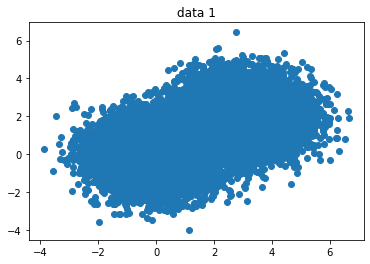

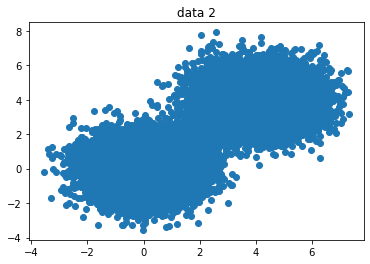

In [11]:
# Create the random points
data1 = np.concatenate((
    np.random.normal(loc = (0, 0), scale = (1, 1), size = (10000, 2)),
    np.random.normal(loc = (3, 2), scale = (1, 1), size = (10000, 2))
)).astype(np.float32)
data2 = np.concatenate((
    np.random.normal(loc = (0, 0), scale = (1, 1), size = (10000, 2)),
    np.random.normal(loc = (4, 4), scale = (1, 1), size = (10000, 2))
)).astype(np.float32)

# Plot the points
plt.title("data 1")
plt.scatter(data1[:, 0], data1[:, 1])
plt.show()

plt.title("data 2")
plt.scatter(data2[:, 0], data2[:, 1])
plt.show()


In [12]:
# We can try to make it so that the distance between the two clusters is the same along each axis (X and Y),
# and make sigma smaller than the distance between the means (so that we can still seperate the clusters).
# I thus chose half of the distance between the means, along each axis.
sigma1 = np.array([1.5, 1], dtype = np.float32)
sigma2 = np.array([2, 2], dtype = np.float32)

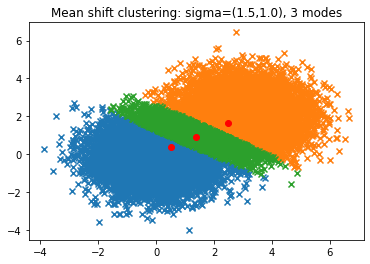

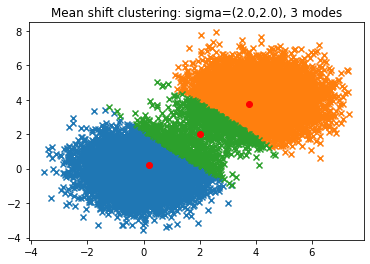

In [15]:
def visualize_clustering(data, sigma):
    modes, labels = fut.cluster_2D(data, sigma)
    modes, labels = modes.get(), labels.get()
    for k in range(len(modes)):
        data_k = np.array([data[i] for i in range(len(data)) if labels[i] == k])
        plt.scatter(data_k[:, 0], data_k[:, 1], marker = 'x')
    plt.scatter(modes[:, 0], modes[:, 1], c = 'r', marker = 'o')
    plt.title("Mean shift clustering: sigma=(%.1f,%.1f), %d modes" % (sigma[0], sigma[1], len(modes)))
    plt.show()
    
visualize_clustering(data1, sigma1)
visualize_clustering(data2, sigma2)